## Black Friday Dataset EDA And Feature Engineering

In [2]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#importing the train dataset
df_train=pd.read_csv('blackFriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [4]:
##  import the test data
df_test=pd.read_csv('blackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df=df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504645 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     504645 non-null  int64  
 1   Product_ID                  504645 non-null  object 
 2   Gender                      504645 non-null  object 
 3   Age                         504645 non-null  object 
 4   Occupation                  504644 non-null  float64
 5   City_Category               504644 non-null  object 
 6   Stay_In_Current_City_Years  504644 non-null  object 
 7   Marital_Status              504644 non-null  float64
 8   Product_Category_1          504644 non-null  float64
 9   Product_Category_2          348351 non-null  float64
 10  Product_Category_3          154105 non-null  float64
 11  Purchase                    271045 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 50.1+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.046450e+05,504644.000000,504644.000000,504644.000000,348351.000000,154105.000000,271045.000000
mean,1.003019e+06,8.078441,0.409800,5.285570,9.847223,12.662814,9320.462170
std,1.722568e+03,6.521020,0.491797,3.741159,5.090600,4.127610,4972.378115
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001510e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5863.000000
50%,1.003066e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8060.000000
75%,1.004461e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12061.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [8]:
df.drop(['User_ID'],axis=1,inplace=True)

In [9]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [10]:
##Handling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,NaN,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,NaN,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,NaN,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,NaN,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,NaN,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [11]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', '2'],
      dtype=object)

In [12]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1, 7])

In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,NaN,0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,NaN,0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,NaN,0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,NaN,0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,NaN,6,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [15]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [16]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,NaN,0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,NaN,0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,NaN,0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,NaN,6,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [17]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,0,10.0,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,NaN,0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,NaN,0,10.0,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,NaN,0,10.0,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,NaN,6,16.0,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [18]:
## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                        504645
Age                                0
Occupation                         1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            156294
Product_Category_3            350540
Purchase                      233600
B                                  0
C                                  0
dtype: int64

In [19]:
## Replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
df['Product_Category_2'].value_counts()

8.0     59033
14.0    51164
2.0     45688
16.0    39979
15.0    35016
5.0     24000
4.0     23830
6.0     15277
11.0    13147
17.0    12408
13.0     9784
9.0      5316
12.0     5039
10.0     2810
3.0      2679
18.0     2637
7.0       544
Name: Product_Category_2, dtype: int64

In [21]:
df['Product_Category_2'].mode()[0]

8.0

In [22]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
df['Product_Category_2'].isnull().sum()

0

In [24]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
df['Product_Category_3'].value_counts()

16.0    30009
15.0    25844
14.0    17039
17.0    15495
5.0     15457
8.0     11571
9.0     10797
12.0     8487
13.0     5049
6.0      4434
18.0     4267
4.0      1755
11.0     1702
10.0     1626
3.0       573
Name: Product_Category_3, dtype: int64

In [26]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,0,10.0,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,NaN,0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,NaN,0,10.0,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,NaN,0,10.0,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,NaN,6,16.0,4+,0.0,8.0,8.0,16.0,7969.0,0,1


In [27]:
df.shape

(504645, 12)

In [28]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [29]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504645 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  504645 non-null  object 
 1   Gender                      0 non-null       float64
 2   Age                         504645 non-null  int64  
 3   Occupation                  504644 non-null  float64
 4   Stay_In_Current_City_Years  504644 non-null  object 
 5   Marital_Status              504644 non-null  float64
 6   Product_Category_1          504644 non-null  float64
 7   Product_Category_2          504645 non-null  float64
 8   Product_Category_3          504645 non-null  float64
 9   Purchase                    271045 non-null  float64
 10  B                           504645 non-null  uint8  
 11  C                           504645 non-null  uint8  
dtypes: float64(7), int64(1), object(2), uint8(2)
memory usage: 43.3+ MB


In [31]:
df[df['Stay_In_Current_City_Years'].isnull()]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
271045,P00120042,NaN,7,NaN,NaN,NaN,NaN,8.0,16.0,NaN,0,0


In [32]:
df.drop(labels=271045, axis=0,inplace=True)

In [ ]:
df.isnull().sum()

In [33]:
##converting object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504644 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  504644 non-null  object 
 1   Gender                      0 non-null       float64
 2   Age                         504644 non-null  int64  
 3   Occupation                  504644 non-null  float64
 4   Stay_In_Current_City_Years  504644 non-null  int64  
 5   Marital_Status              504644 non-null  float64
 6   Product_Category_1          504644 non-null  float64
 7   Product_Category_2          504644 non-null  float64
 8   Product_Category_3          504644 non-null  float64
 9   Purchase                    271045 non-null  float64
 10  B                           504644 non-null  uint8  
 11  C                           504644 non-null  uint8  
dtypes: float64(7), int64(2), object(1), uint8(2)
memory usage: 43.3+ MB


In [34]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504644 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  504644 non-null  object 
 1   Gender                      0 non-null       float64
 2   Age                         504644 non-null  int64  
 3   Occupation                  504644 non-null  float64
 4   Stay_In_Current_City_Years  504644 non-null  int64  
 5   Marital_Status              504644 non-null  float64
 6   Product_Category_1          504644 non-null  float64
 7   Product_Category_2          504644 non-null  float64
 8   Product_Category_3          504644 non-null  float64
 9   Purchase                    271045 non-null  float64
 10  B                           504644 non-null  int64  
 11  C                           504644 non-null  int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 50.1+ MB


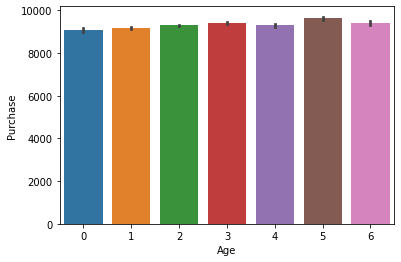

In [40]:
##Visualisation of Age vs Purchased
sns.barplot('Age','Purchase',data=df)

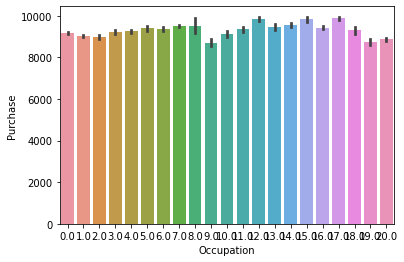

In [42]:
## Visualization of Purchase with occupation
sns.barplot('Occupation','Purchase',data=df)

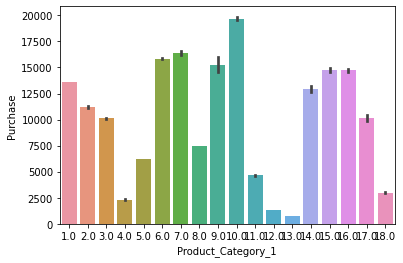

In [43]:
sns.barplot('Product_Category_1','Purchase',data=df)

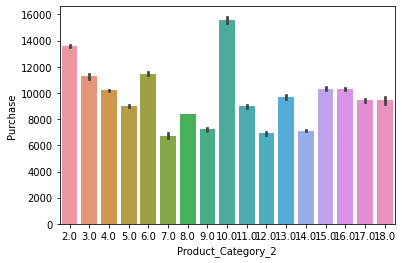

In [44]:
sns.barplot('Product_Category_2','Purchase',data=df)

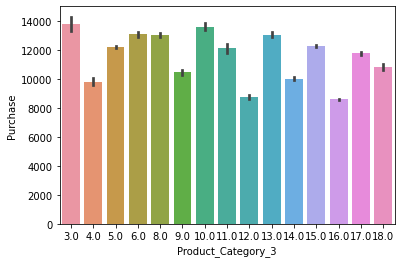

In [45]:
sns.barplot('Product_Category_3','Purchase',data=df)